In [4]:
# 1. Import libraries
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)

## Pruebas varias

### Create network graph maps

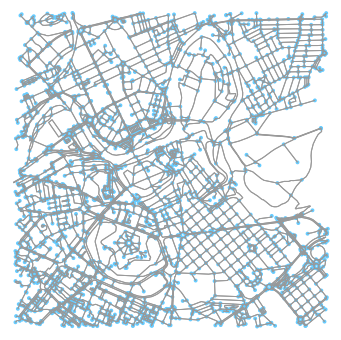

<Figure size 432x288 with 0 Axes>

In [92]:
# 1. Place you are interested
place = "Pamplona, Spain"
# 2. Transportation mode
mode = "walk"
# 3. Create network graph from place and mode
G = ox.graph_from_address(place, distance=1500, simplify=True, network_type=mode)
# 4. Plot the network graph
fig, ax = ox.plot_graph(G);
plt.tight_layout()
plt.show()

In [3]:
import folium as fo
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
# save as html file then display map as an iframe
filepath = 'pamplona.html'
graph_map.save(filepath)
IFrame(filepath, width=900, height=500)

NameError: name 'G' is not defined

In [2]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    # Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, distance=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, distance=dist, network_type=transport_mode )
    return G

In [5]:
# Create a graph from coordinate point
coordinates = create_graph((42.811963, -1.645474), 1500, "walk", loc_type="points")

In [6]:
# Plot the graph with Folium
graph_map = ox.plot_graph_folium(coordinates, popup_attribute='name', edge_width=2)
# save as html file then display map as an iframe
filepath = 'coordinates.html'
graph_map.save(filepath)
IFrame(filepath, width=900, height=500)

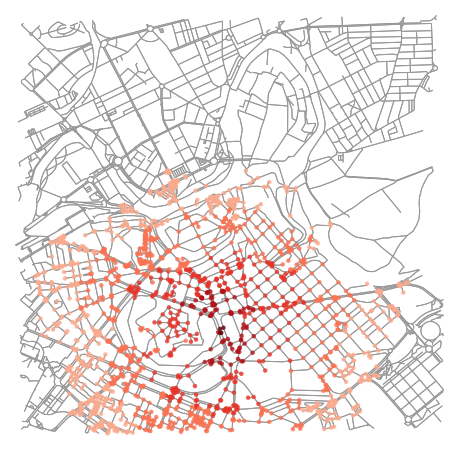

In [3]:
# 1 - Create a graph
G = create_graph(loc= "Pamplona, Spain", dist= 3000, transport_mode= "walk")
# 2 - Create nodes geodataframe from Graph network (G)
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
# 3 - Specify where you want to start and get nearest nodes. 
point_of_interest = ox.get_nearest_node(G, point=(42.811963, -1.645474))
# 4 - Project a graph from lat-long to the UTM zone appropriate for its geographic location.
G = ox.project_graph(G)

# Trip time in Mintues
trip_times = [1, 5, 10, 15, 20]

# walking speed in km/hour
travel_speed = 4.5

# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

# 1 - get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)
# 2 - color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, point_of_interest, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2, dpi=3000)

## Proceso real

In [4]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    # Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, distance=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, distance=dist, network_type=transport_mode )
    return G

In [8]:
# Create a graph from coordinate point
coordinates = create_graph((42.811963, -1.645474), 1500, "walk", loc_type="points")

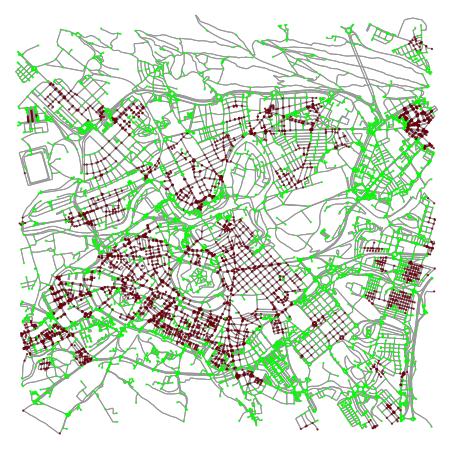

In [11]:
import numpy as np
# 1 - Create a graph
G = create_graph(loc= "Pamplona, Spain", dist= 3000, transport_mode= "walk")
# 2 - Create nodes geodataframe from Graph network (G)
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
# 3 - Specify where you want to start and get nearest nodes.
pharma_coord = [
ox.get_nearest_node(G, point=(42.8301418,-1.6444959)),
ox.get_nearest_node(G, point=(42.8312785,-1.5936407)),
ox.get_nearest_node(G, point=(42.8336553,-1.6633461)),
ox.get_nearest_node(G, point=(42.8171699,-1.6443414)),
ox.get_nearest_node(G, point=(42.8275738,-1.6473344)),
ox.get_nearest_node(G, point=(42.804959,-1.6486264)),
ox.get_nearest_node(G, point=(42.7862029,-1.6924463)),
ox.get_nearest_node(G, point=(42.813144,-1.597353)),
ox.get_nearest_node(G, point=(42.8060904,-1.6574345)),
ox.get_nearest_node(G, point=(42.811778,-1.668443)),
ox.get_nearest_node(G, point=(42.821343,-1.5824621)),
ox.get_nearest_node(G, point=(42.8154203,-1.6507556)),
ox.get_nearest_node(G, point=(42.8072955,-1.6636688)),
ox.get_nearest_node(G, point=(42.8311986,-1.5920538)),
ox.get_nearest_node(G, point=(42.8074502,-1.6463373)),
ox.get_nearest_node(G, point=(42.8064917,-1.6251722)),
ox.get_nearest_node(G, point=(42.8256558,-1.6544379)),
ox.get_nearest_node(G, point=(42.789031,-1.616331)),
ox.get_nearest_node(G, point=(42.8097764,-1.6723301)),
ox.get_nearest_node(G, point=(42.8160339,-1.6566774)),
ox.get_nearest_node(G, point=(42.8122921,-1.6407992)),
ox.get_nearest_node(G, point=(42.8040058,-1.6433975)),
ox.get_nearest_node(G, point=(42.8120983,-1.6735471)),
ox.get_nearest_node(G, point=(42.8039491,-1.6528031)),
ox.get_nearest_node(G, point=(42.8009646,-1.6441157)),
ox.get_nearest_node(G, point=(42.8053852,-1.6745898)),
ox.get_nearest_node(G, point=(42.8168284,-1.6617137)),
ox.get_nearest_node(G, point=(42.8218619,-1.6496325)),
ox.get_nearest_node(G, point=(42.826261,-1.647399)),
ox.get_nearest_node(G, point=(42.8045542,-1.6803417)),
ox.get_nearest_node(G, point=(42.8264615,-1.6592611)),
ox.get_nearest_node(G, point=(42.8126338,-1.6434966)),
ox.get_nearest_node(G, point=(42.8043642,-1.6911159)),
ox.get_nearest_node(G, point=(42.8131748,-1.6606766)),
ox.get_nearest_node(G, point=(42.5245375,-1.6793378)),
ox.get_nearest_node(G, point=(42.8297323,-1.6242236)),
ox.get_nearest_node(G, point=(42.7876943,-1.6929628)),
ox.get_nearest_node(G, point=(42.8087248,-1.5908344)),
ox.get_nearest_node(G, point=(42.8097751,-1.6435557)),
ox.get_nearest_node(G, point=(42.8118623,-1.6455153)),
ox.get_nearest_node(G, point=(42.8329786,-1.6429577)),
ox.get_nearest_node(G, point=(42.5322453,-1.6732135)),
ox.get_nearest_node(G, point=(42.814512,-1.605475)),
ox.get_nearest_node(G, point=(42.5326532,-1.6744421)),
ox.get_nearest_node(G, point=(42.8193358,-1.6700808)),
ox.get_nearest_node(G, point=(42.7986859,-1.6417412)),
ox.get_nearest_node(G, point=(42.8124983,-1.6621262)),
ox.get_nearest_node(G, point=(42.8075758,-1.6345117)),
ox.get_nearest_node(G, point=(42.8017188,-1.6305495)),
ox.get_nearest_node(G, point=(42.8156854,-1.6585818)),
ox.get_nearest_node(G, point=(42.810864,-1.636415)),
ox.get_nearest_node(G, point=(42.8366957,-1.6705028)),
ox.get_nearest_node(G, point=(42.8253,0,-1.6301992)),
ox.get_nearest_node(G, point=(42.8251328,-1.6465744)),
ox.get_nearest_node(G, point=(42.8033148,-1.6463659)),
ox.get_nearest_node(G, point=(42.8030034,-1.6507663)),
ox.get_nearest_node(G, point=(42.814809,-1.6638936)),
ox.get_nearest_node(G, point=(42.812094,-1.659959)),
ox.get_nearest_node(G, point=(42.827425,-1.6685583)),
ox.get_nearest_node(G, point=(42.8317632,-1.5893962)),
ox.get_nearest_node(G, point=(42.8197915,-1.6685741)),
ox.get_nearest_node(G, point=(42.8148994,-1.6579529)),
ox.get_nearest_node(G, point=(42.80794,-1.673676)),
ox.get_nearest_node(G, point=(42.8109819,-1.6438568)),
ox.get_nearest_node(G, point=(42.813499,-1.659208)),
ox.get_nearest_node(G, point=(42.8063535,-1.6283791)),
ox.get_nearest_node(G, point=(42.7848241,-1.6900023)),
ox.get_nearest_node(G, point=(42.8124309,-1.6570329)),
ox.get_nearest_node(G, point=(42.8143579,-1.6499402)),
ox.get_nearest_node(G, point=(42.8234841,-1.6484771)),
ox.get_nearest_node(G, point=(42.8291193,-1.6540165)),
ox.get_nearest_node(G, point=(42.81403,-1.666143)),
ox.get_nearest_node(G, point=(42.8181216,-1.6433475)),
ox.get_nearest_node(G, point=(42.5284011,-1.6752208)),
ox.get_nearest_node(G, point=(42.7834828,-1.6883274)),
ox.get_nearest_node(G, point=(42.8087323,-1.6158182)),
ox.get_nearest_node(G, point=(42.832954,-1.637854)),
ox.get_nearest_node(G, point=(42.8094049,-1.6375374)),
ox.get_nearest_node(G, point=(42.8072309,-1.6436654)),
ox.get_nearest_node(G, point=(42.804152,-1.686632)),
ox.get_nearest_node(G, point=(42.8427119,-1.6104516)),
ox.get_nearest_node(G, point=(42.8091801,-1.6360499)),
ox.get_nearest_node(G, point=(42.5288211,-1.6750681)),
ox.get_nearest_node(G, point=(42.8091913,-1.6374053)),
ox.get_nearest_node(G, point=(42.805870,-1.679841)),
ox.get_nearest_node(G, point=(42.8055308,-1.6834705)),
ox.get_nearest_node(G, point=(42.8133021,-1.6167185)),
ox.get_nearest_node(G, point=(42.8334614,-1.6280947)),
ox.get_nearest_node(G, point=(42.8068473,-1.6525021)),
ox.get_nearest_node(G, point=(42.8334941,-1.6105686)),
ox.get_nearest_node(G, point=(42.8047268,-1.6769213)),
ox.get_nearest_node(G, point=(42.835518,-1.675035)),
ox.get_nearest_node(G, point=(42.8101902,-1.5974146)),
ox.get_nearest_node(G, point=(42.8238088,-1.6516026)),
ox.get_nearest_node(G, point=(42.8323523,-1.6108643)),
ox.get_nearest_node(G, point=(42.5301912,-1.6717563)),
ox.get_nearest_node(G, point=(42.8264807,-1.6669243)),
ox.get_nearest_node(G, point=(42.789432,-1.690644)),
ox.get_nearest_node(G, point=(42.8339691,-1.6668551)),
ox.get_nearest_node(G, point=(42.8313143,-1.6084976)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8114326,-1.6329507)),
ox.get_nearest_node(G, point=(42.831460,-1.632939)),
ox.get_nearest_node(G, point=(42.829751,-1.663502)),
ox.get_nearest_node(G, point=(42.82654,0,-1.6638627)),
ox.get_nearest_node(G, point=(42.8054539,-1.6895777)),
ox.get_nearest_node(G, point=(42.8078506,-1.6124371)),
ox.get_nearest_node(G, point=(42.810076,-1.587908)),
ox.get_nearest_node(G, point=(42.8308591,-1.6254118)),
ox.get_nearest_node(G, point=(42.8232459,-1.6470553)),
ox.get_nearest_node(G, point=(42.8302356,-1.6526081)),
ox.get_nearest_node(G, point=(42.8094586,-1.6553608)),
ox.get_nearest_node(G, point=(42.804009,-1.6472801)),
ox.get_nearest_node(G, point=(42.8177131,-1.6430098)),
ox.get_nearest_node(G, point=(42.8188254,-1.6425918)),
ox.get_nearest_node(G, point=(42.8068747,-1.6400746)),
ox.get_nearest_node(G, point=(42.803943,-1.650544)),
ox.get_nearest_node(G, point=(42.8114692,-1.6420762)),
ox.get_nearest_node(G, point=(42.8009614,-1.6464184)),
ox.get_nearest_node(G, point=(42.7624143,-1.6341653)),
ox.get_nearest_node(G, point=(42.800461,-1.676796)),
ox.get_nearest_node(G, point=(42.823589,-1.695425)),
ox.get_nearest_node(G, point=(42.8073815,-1.6360206)),
ox.get_nearest_node(G, point=(42.761034,-1.634032)),
ox.get_nearest_node(G, point=(42.8098908,-1.6581175)),
ox.get_nearest_node(G, point=(42.8244524,-1.6540836)),
ox.get_nearest_node(G, point=(42.8279042,-1.6663687)),
ox.get_nearest_node(G, point=(42.8317202,-1.6391555)),
ox.get_nearest_node(G, point=(42.8075973,-1.6499607)),
ox.get_nearest_node(G, point=(42.8075367,-1.6569945)),
ox.get_nearest_node(G, point=(42.8226204,-1.6655414)),
ox.get_nearest_node(G, point=(42.8083247,-1.6590852)),
ox.get_nearest_node(G, point=(42.830876,-1.611605)),
ox.get_nearest_node(G, point=(42.827976,-1.644553)),
ox.get_nearest_node(G, point=(42.82062,-1.66406)),
ox.get_nearest_node(G, point=(42.8082156,-1.6446729)),
ox.get_nearest_node(G, point=(42.8343012,-1.6589673)),
ox.get_nearest_node(G, point=(42.8153036,-1.6183125)),
ox.get_nearest_node(G, point=(42.8148765,-1.6414028)),
ox.get_nearest_node(G, point=(42.786338,-1.6184239)),
ox.get_nearest_node(G, point=(42.8010507,-1.6700935)),
ox.get_nearest_node(G, point=(42.5269116,-1.6735726)),
ox.get_nearest_node(G, point=(42.825521,-1.6490302)),
ox.get_nearest_node(G, point=(42.8135703,-1.6565998)),
ox.get_nearest_node(G, point=(42.7559872,-1.6326569)),
ox.get_nearest_node(G, point=(42.8329972,-1.6316921)),
ox.get_nearest_node(G, point=(42.8103354,-1.6417475)),
ox.get_nearest_node(G, point=(42.8057374,-1.6439396)),
ox.get_nearest_node(G, point=(42.8319559,-1.6292105)),
ox.get_nearest_node(G, point=(42.8289145,-1.5928197)),
ox.get_nearest_node(G, point=(42.812660,-1.634572)),
ox.get_nearest_node(G, point=(42.8232785,-1.6631983)),
ox.get_nearest_node(G, point=(42.8159599,-1.6453868)),
ox.get_nearest_node(G, point=(42.822679,-1.577911)),
ox.get_nearest_node(G, point=(42.7877116,-1.6760067)),
ox.get_nearest_node(G, point=(42.8056837,-1.6506192)),
ox.get_nearest_node(G, point=(42.8090195,-1.6185417)),
ox.get_nearest_node(G, point=(42.804158,-1.678642)),
ox.get_nearest_node(G, point=(42.8156668,-1.6472477)),
ox.get_nearest_node(G, point=(42.8162328,-1.6409699)),
ox.get_nearest_node(G, point=(42.803967,-1.6244385)),
ox.get_nearest_node(G, point=(42.8098518,-1.6344314)),
ox.get_nearest_node(G, point=(42.8029924,-1.6791584)),
ox.get_nearest_node(G, point=(42.8099245,-1.6610383)),
ox.get_nearest_node(G, point=(42.804437,-1.672836)),
ox.get_nearest_node(G, point=(42.8349574,-1.6285874)),
ox.get_nearest_node(G, point=(42.810662,-1.665478)),
ox.get_nearest_node(G, point=(42.8059363,-1.6396742)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8094091,-1.5940599)),
ox.get_nearest_node(G, point=(42.834339,-1.6368996)),
ox.get_nearest_node(G, point=(42.8089147,-1.6518192)),
ox.get_nearest_node(G, point=(42.7982837,-1.6142378)),
ox.get_nearest_node(G, point=(42.811174,-1.600239)),
ox.get_nearest_node(G, point=(42.8210384,-1.6685585)),
ox.get_nearest_node(G, point=(42.8210384,-1.6685585)),
ox.get_nearest_node(G, point=(42.8341545,-1.6341346)),
ox.get_nearest_node(G, point=(42.82883,-1.66493)),
ox.get_nearest_node(G, point=(42.82195,0,-1.6630629)),
ox.get_nearest_node(G, point=(42.8074739,-1.6701409)),
ox.get_nearest_node(G, point=(42.813673,-1.644598)),
ox.get_nearest_node(G, point=(42.802646,-1.684031)),
ox.get_nearest_node(G, point=(42.8244464,-1.6311591)),
ox.get_nearest_node(G, point=(42.8258082,-1.6351131)),
ox.get_nearest_node(G, point=(42.8181076,-1.6441551)),
ox.get_nearest_node(G, point=(42.5333944,-1.6697399)),
ox.get_nearest_node(G, point=(42.812177,-1.644965)),
ox.get_nearest_node(G, point=(42.7363003,-1.6338322)),
ox.get_nearest_node(G, point=(42.8322077,-1.6340558)),
ox.get_nearest_node(G, point=(42.8112629,-1.6584113)),
ox.get_nearest_node(G, point=(42.8171176,-1.6584164)),
ox.get_nearest_node(G, point=(42.8013889,-1.6895644)),
ox.get_nearest_node(G, point=(42.8246912,-1.6335737)),
ox.get_nearest_node(G, point=(42.8131206,-1.6422836)),
ox.get_nearest_node(G, point=(42.804538,-1.683571)),
ox.get_nearest_node(G, point=(42.8253724,-1.6956124)),
ox.get_nearest_node(G, point=(42.764024,-1.634441)),
ox.get_nearest_node(G, point=(42.8086824,-1.6720153)),
ox.get_nearest_node(G, point=(42.8327562,-1.6083581)),
ox.get_nearest_node(G, point=(42.808126,-1.634869)),
ox.get_nearest_node(G, point=(42.8184351,-1.6446399)),
ox.get_nearest_node(G, point=(42.8247006,-1.6508328)),
ox.get_nearest_node(G, point=(42.738872,-1.634234)),
ox.get_nearest_node(G, point=(42.8034393,-1.6773218)),
ox.get_nearest_node(G, point=(42.8085849,-1.6138073)),
ox.get_nearest_node(G, point=(42.8054065,-1.6875423)),
ox.get_nearest_node(G, point=(42.82223,-1.65123)),
ox.get_nearest_node(G, point=(42.811687,-1.655335)),
ox.get_nearest_node(G, point=(42.7880268,-1.6888179)),
ox.get_nearest_node(G, point=(42.8079363,-1.6541728)),
ox.get_nearest_node(G, point=(42.8078552,-1.5876062)),
ox.get_nearest_node(G, point=(42.828018,-1.651495)),
ox.get_nearest_node(G, point=(42.8059533,-1.6738292)),
ox.get_nearest_node(G, point=(42.8075758,-1.6345117)),
ox.get_nearest_node(G, point=(42.8099288,-1.6537031)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8181768,-1.6584027)),
ox.get_nearest_node(G, point=(42.8074641,-1.6610673)),
ox.get_nearest_node(G, point=(42.8344922,-1.6421448)),
ox.get_nearest_node(G, point=(42.8021564,-1.6451174)),
ox.get_nearest_node(G, point=(42.8347416,-1.6720758)),
ox.get_nearest_node(G, point=(42.8301226,-1.5902058)),
ox.get_nearest_node(G, point=(42.8042121,-1.6753328)),
ox.get_nearest_node(G, point=(42.811659,-1.6708205)),
ox.get_nearest_node(G, point=(42.79003,-1.70055)),
ox.get_nearest_node(G, point=(42.8124964,-1.6623675)),
ox.get_nearest_node(G, point=(42.8103521,-1.6747371)),
ox.get_nearest_node(G, point=(42.8371092,-1.6747092)),
ox.get_nearest_node(G, point=(42.8104527,-1.6561444)),
ox.get_nearest_node(G, point=(42.8095669,-1.6699579)),
ox.get_nearest_node(G, point=(42.7881099,-1.6788334)),
ox.get_nearest_node(G, point=(42.8174404,-1.6484237)),
ox.get_nearest_node(G, point=(42.8131612,-1.6106919)),
ox.get_nearest_node(G, point=(42.8343448,-1.6607062)),
ox.get_nearest_node(G, point=(42.8055238,-1.6461853)),
ox.get_nearest_node(G, point=(42.8119323,-1.6104905)),
ox.get_nearest_node(G, point=(42.8268476,-1.6569239)),
ox.get_nearest_node(G, point=(42.8119342,-1.6124955)),
ox.get_nearest_node(G, point=(42.8125893,-1.6551436)),
ox.get_nearest_node(G, point=(42.8332396,-1.6123348)),
ox.get_nearest_node(G, point=(42.8124213,-1.6381802)),
ox.get_nearest_node(G, point=(42.8143981,-1.6435621)),
ox.get_nearest_node(G, point=(42.8305351,-1.6420863)),
ox.get_nearest_node(G, point=(42.79366,-1.61583)),
ox.get_nearest_node(G, point=(42.8046363,-1.6418811)),
ox.get_nearest_node(G, point=(42.8073446,-1.6722002)),
ox.get_nearest_node(G, point=(42.8165543,-1.6595273)),
ox.get_nearest_node(G, point=(42.8318246,-1.6624033)),
ox.get_nearest_node(G, point=(42.798198,-1.639819)),
ox.get_nearest_node(G, point=(42.8162307,-1.6433023)),
ox.get_nearest_node(G, point=(42.8262892,-1.6307077)),
ox.get_nearest_node(G, point=(42.8025993,-1.6704969)),
ox.get_nearest_node(G, point=(42.8314003,-1.6369839)),
ox.get_nearest_node(G, point=(42.8106089,-1.6332519)),
ox.get_nearest_node(G, point=(42.822109,-1.6677238)),
ox.get_nearest_node(G, point=(42.8128713,-1.6573915)),
ox.get_nearest_node(G, point=(42.8029473,-1.6426694)),
ox.get_nearest_node(G, point=(42.8062596,-1.6415602)),
ox.get_nearest_node(G, point=(42.8339949,-1.6694057)),
ox.get_nearest_node(G, point=(42.8121975,-1.6369058)),
ox.get_nearest_node(G, point=(42.8040839,-1.6445924)),
ox.get_nearest_node(G, point=(42.826515,-1.650602)),
ox.get_nearest_node(G, point=(42.8038428,-1.6269806)),
ox.get_nearest_node(G, point=(42.8135248,-1.6403049)),
ox.get_nearest_node(G, point=(42.8017608,-1.6857492)),
ox.get_nearest_node(G, point=(42.8088468,-1.6672912)),
ox.get_nearest_node(G, point=(42.8295573,-1.6062003)),
ox.get_nearest_node(G, point=(42.8091255,-1.6743925)),
ox.get_nearest_node(G, point=(42.8135179,-1.6379922)),
ox.get_nearest_node(G, point=(42.8154932,-1.6610788)),
ox.get_nearest_node(G, point=(42.8139265,-1.6622727)),
ox.get_nearest_node(G, point=(42.7370596,-1.6351775)),
ox.get_nearest_node(G, point=(42.8181543,-1.6409114)),
ox.get_nearest_node(G, point=(42.5260521,-1.6797035)),
ox.get_nearest_node(G, point=(42.8290851,-1.6460723)),
ox.get_nearest_node(G, point=(42.799203,-1.6181979)),
ox.get_nearest_node(G, point=(42.806427,-1.662251)),
ox.get_nearest_node(G, point=(42.790070,-1.618322)),
ox.get_nearest_node(G, point=(42.8358916,-1.6728071)),
ox.get_nearest_node(G, point=(42.8052781,-1.6547465)),
ox.get_nearest_node(G, point=(42.8234618,-1.6499685)),
ox.get_nearest_node(G, point=(42.829294,-1.6304806)),
ox.get_nearest_node(G, point=(42.8154112,-1.6636001)),
ox.get_nearest_node(G, point=(42.813997,-1.664517)),
ox.get_nearest_node(G, point=(42.8338816,-1.6793292)),
ox.get_nearest_node(G, point=(42.8074927,-1.6554637)),
ox.get_nearest_node(G, point=(42.8292659,-1.5832073)),
ox.get_nearest_node(G, point=(42.8304604,-1.6229526)),
ox.get_nearest_node(G, point=(42.7588129,-1.6336022)),
ox.get_nearest_node(G, point=(42.8113722,-1.6385176)),
ox.get_nearest_node(G, point=(42.8214587,-1.6664459)),
ox.get_nearest_node(G, point=(42.806549,-1.6479368)),
ox.get_nearest_node(G, point=(42.8144737,-1.6367763)),
ox.get_nearest_node(G, point=(42.80495,0,-1.6339358)),
ox.get_nearest_node(G, point=(42.5296595,-1.6743362)),
ox.get_nearest_node(G, point=(42.8115651,-1.6621785)),
ox.get_nearest_node(G, point=(42.83283,0,-1.6401632)),
ox.get_nearest_node(G, point=(42.8052275,-1.6352623)),
ox.get_nearest_node(G, point=(42.8203896,-1.6712626)),
ox.get_nearest_node(G, point=(42.531843,-1.672543)),
ox.get_nearest_node(G, point=(42.814654,-1.6558639))
               ]
# 4 - Project a graph from lat-long to the UTM zone appropriate for its geographic location.
G = ox.project_graph(G)

# Trip time in Mintues
trip_times = [9]

# walking speed in km/hour
travel_speed = 1

# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

# 1 - get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=1, return_hex=True)
# 2 - color the nodes according to isochrone then plot the street network
node_colors = {}
sub_pharma_coord = []
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    for x in range(len(pharma_coord)):
        sub_pharma_coord.append(nx.ego_graph(G, pharma_coord[x], radius=trip_time, distance='time'))
    for z in range(len(pharma_coord)):
        for node in sub_pharma_coord[z].nodes():
            node_colors[node] = color
nc = [node_colors[node] if node in node_colors else '#00FF00' for node in G.nodes()]
ns = [5 if node in node_colors else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2, dpi=3000, save=True)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not ['#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '#00FF00', 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', 0, '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, '#00FF00', '#00FF00', 0, 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', 0, 0, 0, '#00FF00', 0, 0, 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', '#00FF00', 0, 0, 0, '#00FF00', '#00FF00'].

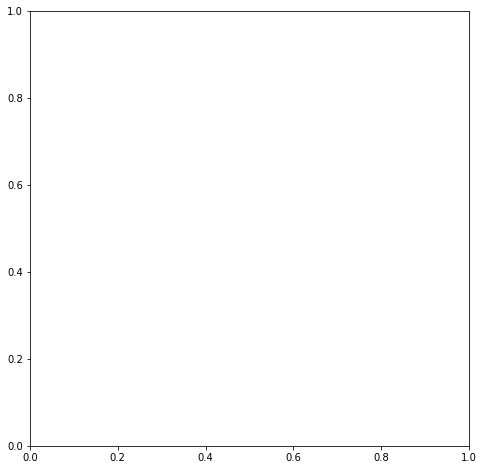

In [15]:
import numpy as np
# 1 - Create a graph
G = create_graph(loc= "Pamplona, Spain", dist= 3000, transport_mode= "walk")
# 2 - Create nodes geodataframe from Graph network (G)
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
# 3 - Specify where you want to start and get nearest nodes.
pharma_coord = [
ox.get_nearest_node(G, point=(42.8301418,-1.6444959)),
ox.get_nearest_node(G, point=(42.8312785,-1.5936407)),
ox.get_nearest_node(G, point=(42.8336553,-1.6633461)),
ox.get_nearest_node(G, point=(42.8171699,-1.6443414)),
ox.get_nearest_node(G, point=(42.8275738,-1.6473344)),
ox.get_nearest_node(G, point=(42.804959,-1.6486264)),
ox.get_nearest_node(G, point=(42.7862029,-1.6924463)),
ox.get_nearest_node(G, point=(42.813144,-1.597353)),
ox.get_nearest_node(G, point=(42.8060904,-1.6574345)),
ox.get_nearest_node(G, point=(42.811778,-1.668443)),
ox.get_nearest_node(G, point=(42.821343,-1.5824621)),
ox.get_nearest_node(G, point=(42.8154203,-1.6507556)),
ox.get_nearest_node(G, point=(42.8072955,-1.6636688)),
ox.get_nearest_node(G, point=(42.8311986,-1.5920538)),
ox.get_nearest_node(G, point=(42.8074502,-1.6463373)),
ox.get_nearest_node(G, point=(42.8064917,-1.6251722)),
ox.get_nearest_node(G, point=(42.8256558,-1.6544379)),
ox.get_nearest_node(G, point=(42.789031,-1.616331)),
ox.get_nearest_node(G, point=(42.8097764,-1.6723301)),
ox.get_nearest_node(G, point=(42.8160339,-1.6566774)),
ox.get_nearest_node(G, point=(42.8122921,-1.6407992)),
ox.get_nearest_node(G, point=(42.8040058,-1.6433975)),
ox.get_nearest_node(G, point=(42.8120983,-1.6735471)),
ox.get_nearest_node(G, point=(42.8039491,-1.6528031)),
ox.get_nearest_node(G, point=(42.8009646,-1.6441157)),
ox.get_nearest_node(G, point=(42.8053852,-1.6745898)),
ox.get_nearest_node(G, point=(42.8168284,-1.6617137)),
ox.get_nearest_node(G, point=(42.8218619,-1.6496325)),
ox.get_nearest_node(G, point=(42.826261,-1.647399)),
ox.get_nearest_node(G, point=(42.8045542,-1.6803417)),
ox.get_nearest_node(G, point=(42.8264615,-1.6592611)),
ox.get_nearest_node(G, point=(42.8126338,-1.6434966)),
ox.get_nearest_node(G, point=(42.8043642,-1.6911159)),
ox.get_nearest_node(G, point=(42.8131748,-1.6606766)),
ox.get_nearest_node(G, point=(42.5245375,-1.6793378)),
ox.get_nearest_node(G, point=(42.8297323,-1.6242236)),
ox.get_nearest_node(G, point=(42.7876943,-1.6929628)),
ox.get_nearest_node(G, point=(42.8087248,-1.5908344)),
ox.get_nearest_node(G, point=(42.8097751,-1.6435557)),
ox.get_nearest_node(G, point=(42.8118623,-1.6455153)),
ox.get_nearest_node(G, point=(42.8329786,-1.6429577)),
ox.get_nearest_node(G, point=(42.5322453,-1.6732135)),
ox.get_nearest_node(G, point=(42.814512,-1.605475)),
ox.get_nearest_node(G, point=(42.5326532,-1.6744421)),
ox.get_nearest_node(G, point=(42.8193358,-1.6700808)),
ox.get_nearest_node(G, point=(42.7986859,-1.6417412)),
ox.get_nearest_node(G, point=(42.8124983,-1.6621262)),
ox.get_nearest_node(G, point=(42.8075758,-1.6345117)),
ox.get_nearest_node(G, point=(42.8017188,-1.6305495)),
ox.get_nearest_node(G, point=(42.8156854,-1.6585818)),
ox.get_nearest_node(G, point=(42.810864,-1.636415)),
ox.get_nearest_node(G, point=(42.8366957,-1.6705028)),
ox.get_nearest_node(G, point=(42.8253,0,-1.6301992)),
ox.get_nearest_node(G, point=(42.8251328,-1.6465744)),
ox.get_nearest_node(G, point=(42.8033148,-1.6463659)),
ox.get_nearest_node(G, point=(42.8030034,-1.6507663)),
ox.get_nearest_node(G, point=(42.814809,-1.6638936)),
ox.get_nearest_node(G, point=(42.812094,-1.659959)),
ox.get_nearest_node(G, point=(42.827425,-1.6685583)),
ox.get_nearest_node(G, point=(42.8317632,-1.5893962)),
ox.get_nearest_node(G, point=(42.8197915,-1.6685741)),
ox.get_nearest_node(G, point=(42.8148994,-1.6579529)),
ox.get_nearest_node(G, point=(42.80794,-1.673676)),
ox.get_nearest_node(G, point=(42.8109819,-1.6438568)),
ox.get_nearest_node(G, point=(42.813499,-1.659208)),
ox.get_nearest_node(G, point=(42.8063535,-1.6283791)),
ox.get_nearest_node(G, point=(42.7848241,-1.6900023)),
ox.get_nearest_node(G, point=(42.8124309,-1.6570329)),
ox.get_nearest_node(G, point=(42.8143579,-1.6499402)),
ox.get_nearest_node(G, point=(42.8234841,-1.6484771)),
ox.get_nearest_node(G, point=(42.8291193,-1.6540165)),
ox.get_nearest_node(G, point=(42.81403,-1.666143)),
ox.get_nearest_node(G, point=(42.8181216,-1.6433475)),
ox.get_nearest_node(G, point=(42.5284011,-1.6752208)),
ox.get_nearest_node(G, point=(42.7834828,-1.6883274)),
ox.get_nearest_node(G, point=(42.8087323,-1.6158182)),
ox.get_nearest_node(G, point=(42.832954,-1.637854)),
ox.get_nearest_node(G, point=(42.8094049,-1.6375374)),
ox.get_nearest_node(G, point=(42.8072309,-1.6436654)),
ox.get_nearest_node(G, point=(42.804152,-1.686632)),
ox.get_nearest_node(G, point=(42.8427119,-1.6104516)),
ox.get_nearest_node(G, point=(42.8091801,-1.6360499)),
ox.get_nearest_node(G, point=(42.5288211,-1.6750681)),
ox.get_nearest_node(G, point=(42.8091913,-1.6374053)),
ox.get_nearest_node(G, point=(42.805870,-1.679841)),
ox.get_nearest_node(G, point=(42.8055308,-1.6834705)),
ox.get_nearest_node(G, point=(42.8133021,-1.6167185)),
ox.get_nearest_node(G, point=(42.8334614,-1.6280947)),
ox.get_nearest_node(G, point=(42.8068473,-1.6525021)),
ox.get_nearest_node(G, point=(42.8334941,-1.6105686)),
ox.get_nearest_node(G, point=(42.8047268,-1.6769213)),
ox.get_nearest_node(G, point=(42.835518,-1.675035)),
ox.get_nearest_node(G, point=(42.8101902,-1.5974146)),
ox.get_nearest_node(G, point=(42.8238088,-1.6516026)),
ox.get_nearest_node(G, point=(42.8323523,-1.6108643)),
ox.get_nearest_node(G, point=(42.5301912,-1.6717563)),
ox.get_nearest_node(G, point=(42.8264807,-1.6669243)),
ox.get_nearest_node(G, point=(42.789432,-1.690644)),
ox.get_nearest_node(G, point=(42.8339691,-1.6668551)),
ox.get_nearest_node(G, point=(42.8313143,-1.6084976)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8114326,-1.6329507)),
ox.get_nearest_node(G, point=(42.831460,-1.632939)),
ox.get_nearest_node(G, point=(42.829751,-1.663502)),
ox.get_nearest_node(G, point=(42.82654,0,-1.6638627)),
ox.get_nearest_node(G, point=(42.8054539,-1.6895777)),
ox.get_nearest_node(G, point=(42.8078506,-1.6124371)),
ox.get_nearest_node(G, point=(42.810076,-1.587908)),
ox.get_nearest_node(G, point=(42.8308591,-1.6254118)),
ox.get_nearest_node(G, point=(42.8232459,-1.6470553)),
ox.get_nearest_node(G, point=(42.8302356,-1.6526081)),
ox.get_nearest_node(G, point=(42.8094586,-1.6553608)),
ox.get_nearest_node(G, point=(42.804009,-1.6472801)),
ox.get_nearest_node(G, point=(42.8177131,-1.6430098)),
ox.get_nearest_node(G, point=(42.8188254,-1.6425918)),
ox.get_nearest_node(G, point=(42.8068747,-1.6400746)),
ox.get_nearest_node(G, point=(42.803943,-1.650544)),
ox.get_nearest_node(G, point=(42.8114692,-1.6420762)),
ox.get_nearest_node(G, point=(42.8009614,-1.6464184)),
ox.get_nearest_node(G, point=(42.7624143,-1.6341653)),
ox.get_nearest_node(G, point=(42.800461,-1.676796)),
ox.get_nearest_node(G, point=(42.823589,-1.695425)),
ox.get_nearest_node(G, point=(42.8073815,-1.6360206)),
ox.get_nearest_node(G, point=(42.761034,-1.634032)),
ox.get_nearest_node(G, point=(42.8098908,-1.6581175)),
ox.get_nearest_node(G, point=(42.8244524,-1.6540836)),
ox.get_nearest_node(G, point=(42.8279042,-1.6663687)),
ox.get_nearest_node(G, point=(42.8317202,-1.6391555)),
ox.get_nearest_node(G, point=(42.8075973,-1.6499607)),
ox.get_nearest_node(G, point=(42.8075367,-1.6569945)),
ox.get_nearest_node(G, point=(42.8226204,-1.6655414)),
ox.get_nearest_node(G, point=(42.8083247,-1.6590852)),
ox.get_nearest_node(G, point=(42.830876,-1.611605)),
ox.get_nearest_node(G, point=(42.827976,-1.644553)),
ox.get_nearest_node(G, point=(42.82062,-1.66406)),
ox.get_nearest_node(G, point=(42.8082156,-1.6446729)),
ox.get_nearest_node(G, point=(42.8343012,-1.6589673)),
ox.get_nearest_node(G, point=(42.8153036,-1.6183125)),
ox.get_nearest_node(G, point=(42.8148765,-1.6414028)),
ox.get_nearest_node(G, point=(42.786338,-1.6184239)),
ox.get_nearest_node(G, point=(42.8010507,-1.6700935)),
ox.get_nearest_node(G, point=(42.5269116,-1.6735726)),
ox.get_nearest_node(G, point=(42.825521,-1.6490302)),
ox.get_nearest_node(G, point=(42.8135703,-1.6565998)),
ox.get_nearest_node(G, point=(42.7559872,-1.6326569)),
ox.get_nearest_node(G, point=(42.8329972,-1.6316921)),
ox.get_nearest_node(G, point=(42.8103354,-1.6417475)),
ox.get_nearest_node(G, point=(42.8057374,-1.6439396)),
ox.get_nearest_node(G, point=(42.8319559,-1.6292105)),
ox.get_nearest_node(G, point=(42.8289145,-1.5928197)),
ox.get_nearest_node(G, point=(42.812660,-1.634572)),
ox.get_nearest_node(G, point=(42.8232785,-1.6631983)),
ox.get_nearest_node(G, point=(42.8159599,-1.6453868)),
ox.get_nearest_node(G, point=(42.822679,-1.577911)),
ox.get_nearest_node(G, point=(42.7877116,-1.6760067)),
ox.get_nearest_node(G, point=(42.8056837,-1.6506192)),
ox.get_nearest_node(G, point=(42.8090195,-1.6185417)),
ox.get_nearest_node(G, point=(42.804158,-1.678642)),
ox.get_nearest_node(G, point=(42.8156668,-1.6472477)),
ox.get_nearest_node(G, point=(42.8162328,-1.6409699)),
ox.get_nearest_node(G, point=(42.803967,-1.6244385)),
ox.get_nearest_node(G, point=(42.8098518,-1.6344314)),
ox.get_nearest_node(G, point=(42.8029924,-1.6791584)),
ox.get_nearest_node(G, point=(42.8099245,-1.6610383)),
ox.get_nearest_node(G, point=(42.804437,-1.672836)),
ox.get_nearest_node(G, point=(42.8349574,-1.6285874)),
ox.get_nearest_node(G, point=(42.810662,-1.665478)),
ox.get_nearest_node(G, point=(42.8059363,-1.6396742)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8094091,-1.5940599)),
ox.get_nearest_node(G, point=(42.834339,-1.6368996)),
ox.get_nearest_node(G, point=(42.8089147,-1.6518192)),
ox.get_nearest_node(G, point=(42.7982837,-1.6142378)),
ox.get_nearest_node(G, point=(42.811174,-1.600239)),
ox.get_nearest_node(G, point=(42.8210384,-1.6685585)),
ox.get_nearest_node(G, point=(42.8210384,-1.6685585)),
ox.get_nearest_node(G, point=(42.8341545,-1.6341346)),
ox.get_nearest_node(G, point=(42.82883,-1.66493)),
ox.get_nearest_node(G, point=(42.82195,0,-1.6630629)),
ox.get_nearest_node(G, point=(42.8074739,-1.6701409)),
ox.get_nearest_node(G, point=(42.813673,-1.644598)),
ox.get_nearest_node(G, point=(42.802646,-1.684031)),
ox.get_nearest_node(G, point=(42.8244464,-1.6311591)),
ox.get_nearest_node(G, point=(42.8258082,-1.6351131)),
ox.get_nearest_node(G, point=(42.8181076,-1.6441551)),
ox.get_nearest_node(G, point=(42.5333944,-1.6697399)),
ox.get_nearest_node(G, point=(42.812177,-1.644965)),
ox.get_nearest_node(G, point=(42.7363003,-1.6338322)),
ox.get_nearest_node(G, point=(42.8322077,-1.6340558)),
ox.get_nearest_node(G, point=(42.8112629,-1.6584113)),
ox.get_nearest_node(G, point=(42.8171176,-1.6584164)),
ox.get_nearest_node(G, point=(42.8013889,-1.6895644)),
ox.get_nearest_node(G, point=(42.8246912,-1.6335737)),
ox.get_nearest_node(G, point=(42.8131206,-1.6422836)),
ox.get_nearest_node(G, point=(42.804538,-1.683571)),
ox.get_nearest_node(G, point=(42.8253724,-1.6956124)),
ox.get_nearest_node(G, point=(42.764024,-1.634441)),
ox.get_nearest_node(G, point=(42.8086824,-1.6720153)),
ox.get_nearest_node(G, point=(42.8327562,-1.6083581)),
ox.get_nearest_node(G, point=(42.808126,-1.634869)),
ox.get_nearest_node(G, point=(42.8184351,-1.6446399)),
ox.get_nearest_node(G, point=(42.8247006,-1.6508328)),
ox.get_nearest_node(G, point=(42.738872,-1.634234)),
ox.get_nearest_node(G, point=(42.8034393,-1.6773218)),
ox.get_nearest_node(G, point=(42.8085849,-1.6138073)),
ox.get_nearest_node(G, point=(42.8054065,-1.6875423)),
ox.get_nearest_node(G, point=(42.82223,-1.65123)),
ox.get_nearest_node(G, point=(42.811687,-1.655335)),
ox.get_nearest_node(G, point=(42.7880268,-1.6888179)),
ox.get_nearest_node(G, point=(42.8079363,-1.6541728)),
ox.get_nearest_node(G, point=(42.8078552,-1.5876062)),
ox.get_nearest_node(G, point=(42.828018,-1.651495)),
ox.get_nearest_node(G, point=(42.8059533,-1.6738292)),
ox.get_nearest_node(G, point=(42.8075758,-1.6345117)),
ox.get_nearest_node(G, point=(42.8099288,-1.6537031)),
ox.get_nearest_node(G, point=(42.8250658,-1.6492773)),
ox.get_nearest_node(G, point=(42.8181768,-1.6584027)),
ox.get_nearest_node(G, point=(42.8074641,-1.6610673)),
ox.get_nearest_node(G, point=(42.8344922,-1.6421448)),
ox.get_nearest_node(G, point=(42.8021564,-1.6451174)),
ox.get_nearest_node(G, point=(42.8347416,-1.6720758)),
ox.get_nearest_node(G, point=(42.8301226,-1.5902058)),
ox.get_nearest_node(G, point=(42.8042121,-1.6753328)),
ox.get_nearest_node(G, point=(42.811659,-1.6708205)),
ox.get_nearest_node(G, point=(42.79003,-1.70055)),
ox.get_nearest_node(G, point=(42.8124964,-1.6623675)),
ox.get_nearest_node(G, point=(42.8103521,-1.6747371)),
ox.get_nearest_node(G, point=(42.8371092,-1.6747092)),
ox.get_nearest_node(G, point=(42.8104527,-1.6561444)),
ox.get_nearest_node(G, point=(42.8095669,-1.6699579)),
ox.get_nearest_node(G, point=(42.7881099,-1.6788334)),
ox.get_nearest_node(G, point=(42.8174404,-1.6484237)),
ox.get_nearest_node(G, point=(42.8131612,-1.6106919)),
ox.get_nearest_node(G, point=(42.8343448,-1.6607062)),
ox.get_nearest_node(G, point=(42.8055238,-1.6461853)),
ox.get_nearest_node(G, point=(42.8119323,-1.6104905)),
ox.get_nearest_node(G, point=(42.8268476,-1.6569239)),
ox.get_nearest_node(G, point=(42.8119342,-1.6124955)),
ox.get_nearest_node(G, point=(42.8125893,-1.6551436)),
ox.get_nearest_node(G, point=(42.8332396,-1.6123348)),
ox.get_nearest_node(G, point=(42.8124213,-1.6381802)),
ox.get_nearest_node(G, point=(42.8143981,-1.6435621)),
ox.get_nearest_node(G, point=(42.8305351,-1.6420863)),
ox.get_nearest_node(G, point=(42.79366,-1.61583)),
ox.get_nearest_node(G, point=(42.8046363,-1.6418811)),
ox.get_nearest_node(G, point=(42.8073446,-1.6722002)),
ox.get_nearest_node(G, point=(42.8165543,-1.6595273)),
ox.get_nearest_node(G, point=(42.8318246,-1.6624033)),
ox.get_nearest_node(G, point=(42.798198,-1.639819)),
ox.get_nearest_node(G, point=(42.8162307,-1.6433023)),
ox.get_nearest_node(G, point=(42.8262892,-1.6307077)),
ox.get_nearest_node(G, point=(42.8025993,-1.6704969)),
ox.get_nearest_node(G, point=(42.8314003,-1.6369839)),
ox.get_nearest_node(G, point=(42.8106089,-1.6332519)),
ox.get_nearest_node(G, point=(42.822109,-1.6677238)),
ox.get_nearest_node(G, point=(42.8128713,-1.6573915)),
ox.get_nearest_node(G, point=(42.8029473,-1.6426694)),
ox.get_nearest_node(G, point=(42.8062596,-1.6415602)),
ox.get_nearest_node(G, point=(42.8339949,-1.6694057)),
ox.get_nearest_node(G, point=(42.8121975,-1.6369058)),
ox.get_nearest_node(G, point=(42.8040839,-1.6445924)),
ox.get_nearest_node(G, point=(42.826515,-1.650602)),
ox.get_nearest_node(G, point=(42.8038428,-1.6269806)),
ox.get_nearest_node(G, point=(42.8135248,-1.6403049)),
ox.get_nearest_node(G, point=(42.8017608,-1.6857492)),
ox.get_nearest_node(G, point=(42.8088468,-1.6672912)),
ox.get_nearest_node(G, point=(42.8295573,-1.6062003)),
ox.get_nearest_node(G, point=(42.8091255,-1.6743925)),
ox.get_nearest_node(G, point=(42.8135179,-1.6379922)),
ox.get_nearest_node(G, point=(42.8154932,-1.6610788)),
ox.get_nearest_node(G, point=(42.8139265,-1.6622727)),
ox.get_nearest_node(G, point=(42.7370596,-1.6351775)),
ox.get_nearest_node(G, point=(42.8181543,-1.6409114)),
ox.get_nearest_node(G, point=(42.5260521,-1.6797035)),
ox.get_nearest_node(G, point=(42.8290851,-1.6460723)),
ox.get_nearest_node(G, point=(42.799203,-1.6181979)),
ox.get_nearest_node(G, point=(42.806427,-1.662251)),
ox.get_nearest_node(G, point=(42.790070,-1.618322)),
ox.get_nearest_node(G, point=(42.8358916,-1.6728071)),
ox.get_nearest_node(G, point=(42.8052781,-1.6547465)),
ox.get_nearest_node(G, point=(42.8234618,-1.6499685)),
ox.get_nearest_node(G, point=(42.829294,-1.6304806)),
ox.get_nearest_node(G, point=(42.8154112,-1.6636001)),
ox.get_nearest_node(G, point=(42.813997,-1.664517)),
ox.get_nearest_node(G, point=(42.8338816,-1.6793292)),
ox.get_nearest_node(G, point=(42.8074927,-1.6554637)),
ox.get_nearest_node(G, point=(42.8292659,-1.5832073)),
ox.get_nearest_node(G, point=(42.8304604,-1.6229526)),
ox.get_nearest_node(G, point=(42.7588129,-1.6336022)),
ox.get_nearest_node(G, point=(42.8113722,-1.6385176)),
ox.get_nearest_node(G, point=(42.8214587,-1.6664459)),
ox.get_nearest_node(G, point=(42.806549,-1.6479368)),
ox.get_nearest_node(G, point=(42.8144737,-1.6367763)),
ox.get_nearest_node(G, point=(42.80495,0,-1.6339358)),
ox.get_nearest_node(G, point=(42.5296595,-1.6743362)),
ox.get_nearest_node(G, point=(42.8115651,-1.6621785)),
ox.get_nearest_node(G, point=(42.83283,0,-1.6401632)),
ox.get_nearest_node(G, point=(42.8052275,-1.6352623)),
ox.get_nearest_node(G, point=(42.8203896,-1.6712626)),
ox.get_nearest_node(G, point=(42.531843,-1.672543)),
ox.get_nearest_node(G, point=(42.814654,-1.6558639))
               ]
# 4 - Project a graph from lat-long to the UTM zone appropriate for its geographic location.
G = ox.project_graph(G)

# Trip time in Mintues
trip_times = [9]

# walking speed in km/hour
travel_speed = 1

# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, datsa in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

# 1 - get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=1, return_hex=True)
# 2 - color the nodes according to isochrone then plot the street network
node_colors = {}
sub_pharma_coord = []
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    for x in range(len(pharma_coord)):
        sub_pharma_coord.append(nx.ego_graph(G, pharma_coord[x], radius=trip_time, distance='time'))
    for z in range(len(pharma_coord)):
        for node in sub_pharma_coord[z].nodes():
            node_colors[node] = color
nc = [node_colors[node] if node in node_colors else '#00FF00' for node in G.nodes()]
ns = [5 if node in node_colors else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2, dpi=3000, save=True)

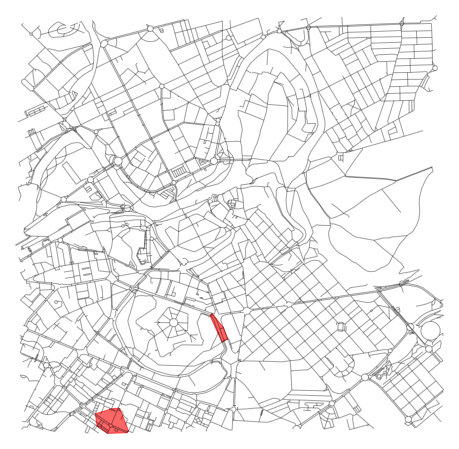

In [82]:
import geopandas as gpd
isochrone_polys = []
isochrone_polys2 = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, point_of_interest, radius=trip_time, distance='time')
    subgraph2 = nx.ego_graph(G, point_of_interest2, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    node_points2 = [Point((data['x'], data['y'])) for node, data in subgraph2.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    bounding_poly2 = gpd.GeoSeries(node_points2).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)
    isochrone_polys2.append(bounding_poly2)
# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(G, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc='#FF0000', ec='#FF0000', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
for polygon, fc in zip(isochrone_polys2, iso_colors):
    patch = PolygonPatch(polygon, fc='#FF0000', ec='#FF0000', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [3]:
from qgis.core import plugins

ModuleNotFoundError: No module named 'qgis'